# **Least Squares**

In [22]:
# Import necessary packages.

import numpy as np
from numpy.linalg import inv       # Inverse matrix
import pandas as pd
import matplotlib.pyplot as plt

import regression as reg           # Least squares implementation

## **Ordinary Least Squares**

In [2]:
# Solving for Least Squares with One Regressor (Hansen (2022a) Chapter 3.5)

## Construct a dataset consists of 20 pairs of (Yi, Xi).
np.random.seed(101)
n = 20 # number of observations
X = np.random.uniform(0, 1, n) # X ~ U(0, 1)
Y = 3*X + np.random.normal(0, 1, n) # Y ~ N(3X, 1)

## Calculate the sum of squared error function given a parameter space of β.
B = np.linspace(2, 4, 1000) # Parameter space of β
sse = np.array([np.sum((Y - X*b)**2) for b in B])
β_ols = B[np.argmin(sse)]

In [3]:
print(f'β_ols: {β_ols:.3f}')

β_ols: 3.233


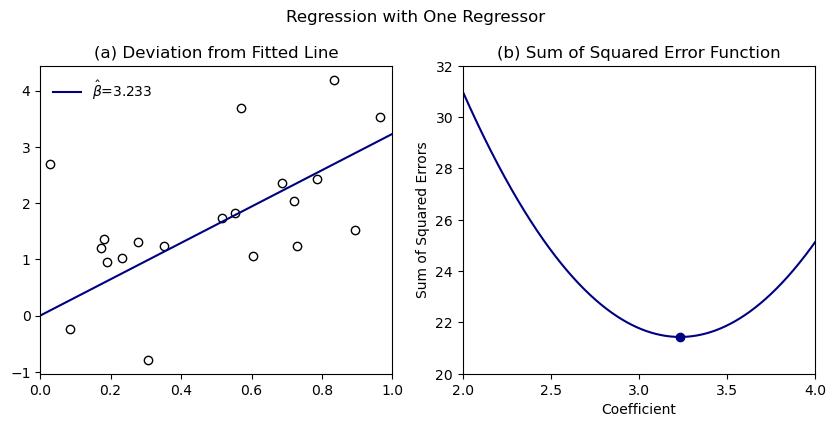

In [4]:
# Figure 3.1. of Hansen (2022a)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle('Regression with One Regressor', y=1.02)

# (a) Deviation from Fitted Line
ax[0].scatter(X, Y, color='white', edgecolor='k')
ax[0].plot(np.linspace(0, 1, 100), β_ols*np.linspace(0, 1, 100), color='navy', label=fr'$\hat\beta$={β_ols:.3f}')
ax[0].set_title('(a) Deviation from Fitted Line')
ax[0].set_xmargin(0)
ax[0].legend(frameon=False)

# (b) Sum of Squared Error Function
ax[1].plot(B, sse, color='navy')
ax[1].scatter(β_ols, sse[np.argmin(sse)], color='navy')
ax[1].set_title('(b) Sum of Squared Error Function')
ax[1].set_xmargin(0)
ax[1].set_ylim([20, 32])
ax[1].set_ylabel('Sum of Squared Errors')
ax[1].set_xlabel('Coefficient')
ax[1].set_xticks([2.0, 2.5, 3.0, 3.5, 4.0])

plt.show()

In [5]:
# Solving for Least Squares with Two Regressors

## Construct a dataset consists of 100 triples (Yi, X1i, X2i).
## The construction follows the code `figure3_2.R` of Hansen (2022).
np.random.seed(1011)
n = 100 # number of observations
X = np.random.multivariate_normal(mean=[0, 0], 
                                  cov=[[1/4, -1/8], 
                                       [-1/8, 1/4]], 
                                  size=n)
X1 = X[:, 0]
X2 = X[:, 1]
e = 2*np.random.normal(size=n)
Y = 3*X1 + 3*X2 + e

## Calculate the sum of squared error function given a parameter space of β 
B1 = np.linspace(2, 4, 1000) # Parameter space of β1
B2 = np.linspace(2, 4, 1000) # Parameter space of β2

sse = np.array([np.sum((Y - X1*b1 - X2*b2)**2) for b2 in B2 for b1 in B1])
β1_ols = B1[np.argmin(sse)%1000]
β2_ols = B2[np.argmin(sse)//1000]

In [6]:
print(f'β1_ols: {β1_ols:.3f}')
print(f'β2_ols: {β2_ols:.3f}')

β1_ols: 3.159
β2_ols: 3.241


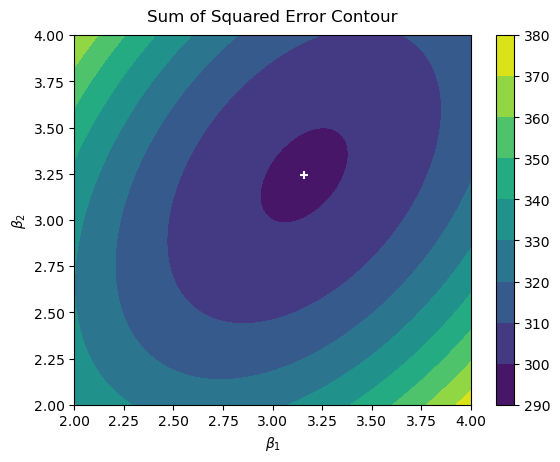

In [7]:
fig, ax = plt.subplots()

cs = ax.contourf(B1, B2, sse.reshape(1000, 1000), cmap='viridis')
cbar = fig.colorbar(cs) # Add colorbar
ax.scatter(β1_ols, β2_ols, c='white', marker='+')

ax.set_title('Sum of Squared Error Contour', pad=10)
ax.set_xlabel(r'$\beta_1$')
ax.set_ylabel(r'$\beta_2$')

plt.show()

In [8]:
# Ordinary Least Squares Estimator of β

ols = reg.OLS(Y, X) # Define an OLS model.

In [9]:
ols.coefficients() # Compute coefficients β_ols

array([3.15877166, 3.24156324])

In [10]:
ols.residuals() # Compute residuals u = Y - Xβ_ols

array([ 2.41635622, -0.38692171,  0.17482056,  0.54376638,  1.61958981,
       -1.7769589 , -2.05470324, -1.37666305, -2.34729678, -0.47664959,
        0.71522303,  3.19075612,  0.38069079, -0.37294042, -1.38235158,
       -1.89579135, -0.27627812,  1.7125991 ,  0.92966051, -4.38803335,
        3.16539618,  1.57506645,  2.28783909,  0.31733447, -0.90766134,
        2.53383858, -1.10895746, -5.32799056,  0.88144428,  0.13335655,
        0.58476563,  1.18306821, -0.28870365, -1.12078881, -1.02087616,
       -1.09947756, -1.12394017, -2.1996854 , -0.30248947, -1.53182052,
       -0.40517449,  0.59622749, -2.1685889 ,  1.22407605, -1.21612906,
        0.5758122 , -1.06396577,  0.66491499, -0.08977045, -1.84542812,
       -1.21266156,  2.24447538,  1.36358297,  4.43578762,  0.18799963,
       -1.28886723,  1.50279258,  0.88880645, -1.20134063,  1.48835501,
       -0.80296277,  2.93832766, -0.59217018, -0.84299276,  0.09883814,
       -0.75232116, -1.75902476,  0.89165485,  1.55190923,  1.43

In [ ]:
PX == X

In [11]:
check = np.sum(np.abs(ols.projection_matrix() @ X - X) < 1e-10) # Check PX = X numerically.

if check==200:
    print('PX == X')
else:
    print('PX != X')

PX == X


In [12]:
check = np.sum(np.abs(ols.annihilator_matrix() @ X) < 1e-10) # Check MX = 0 numerically.

if check==200:
    print('MX == 0')
else:
    print('MX != 0')

MX == 0


In [13]:
# Analysis of Variance

## Coefficient of determination; (Unadjusted) R-squared
print(f'R-squared: {ols.r_squared():.3f}')

R-squared: 0.491


In [14]:
# Leverage Values (3.19)
h = ols.leverage_values()
h.shape

(100,)

In [15]:
# Leave-One-Out Regression (Hansen (2022a) Chapter 3.20)
β_loo = ols.coefficients_loo()
β_loo.shape

(100, 2)

In [16]:
# Influential Observations (Hansen (2022a) Chapter 3.21)

## Construct data for simulation.
np.random.seed(101)
n = 25 # 25 observations of (Y, X)
X = np.random.uniform(1, 10, n) # X ~ U(1, 10)
Y = np.random.normal(X, 2) # Y ~ N(Xi, 4)
Xf = np.append(X, 9) # Full sample X
Yf = np.append(Y, 0) # Full sample Y

## Add a column of intercept to each dataset.
Xc = np.concatenate([X.reshape(-1, 1), np.ones(n).reshape(-1, 1)], axis=1)
Xcf = np.concatenate([Xf.reshape(-1, 1), np.ones(n+1).reshape(-1, 1)], axis=1)

## Define models respectively.
ols_loo = reg.OLS(Y, Xc)  # Leave-One-Out OLS
ols_fs = reg.OLS(Yf, Xcf) # Full Sample OLS

## Compute coefficients
b1_loo, b0_loo = ols_loo.coefficients()
b1_fs, b0_fs = ols_fs.coefficients()

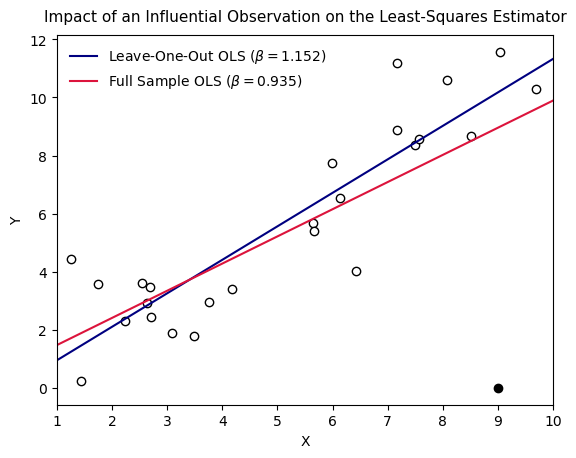

In [17]:
fig, ax = plt.subplots()

x_grid = np.linspace(1, 10, 100)

ax.scatter(X, Y, color='white', edgecolor='k')
ax.scatter(9, 0, color='k') # an outlier
ax.plot(x_grid, b1_loo*x_grid+b0_loo, color='navy', label=rf'Leave-One-Out OLS ($\beta = {b1_loo:.3f}$)') # Leave-One-Out OLS
ax.plot(x_grid, b1_fs*x_grid+b0_fs, color='crimson', label=rf'Full Sample OLS ($\beta = {b1_fs:.3f}$)')   # Full Sample OLS

ax.set_title('Impact of an Influential Observation on the Least-Squares Estimator', pad=10, fontsize=11)
ax.legend(frameon=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([1, 10])
ax.set_xmargin(0)

plt.show()

In [18]:
# Check if LOO coefficient is consistent with the value computed from function defined above.

np.sum(np.abs(ols_fs.coefficients_loo()[-1] - ols_loo.coefficients()) < 1e-10) == ols_fs.k

True

In [19]:
# Influence
influence = ols_fs.influence()
print(f'Influence of Full Sample: {influence:.3f}')

Influence of Full Sample: 0.393


## **Generalized Least Squares**

In [23]:
## Construct a dataset consists of 100 triples (Yi, X1i, X2i).
## The construction follows the code `figure3_2.R` of Hansen (2022).
np.random.seed(1011)
n = 100 # number of observations
X = np.random.multivariate_normal(mean=[0, 0], 
                                  cov=[[1/4, -1/8], 
                                       [-1/8, 1/4]], 
                                  size=n)
X1 = X[:, 0]
X2 = X[:, 1]
e = 2*np.random.normal(size=n)
Y = 3*X1 + 3*X2 + e

In [35]:
# Standard errors
se1 = ols.standard_errors()      # Homoskedastic formula
se2 = ols.standard_errors('HC0') # HC0 formula
se3 = ols.standard_errors('HC1') # HC1 formula
se4 = ols.standard_errors('HC2') # HC2 formula
se5 = ols.standard_errors('HC3') # HC3 formula

results = pd.DataFrame([se1, se2, se3, se4, se5], columns=[f'X{i+1}' for i in range(ols.k)], index=['Homoskedastic', 'HC0', 'HC1', 'HC2', 'HC3'])
results

,X1,X2
Homoskedastic,3.582421,4.157425
HC0,0.299176,0.390175
HC1,0.302213,0.394137
HC2,0.303634,0.395746
HC3,0.308214,0.401454
